<font size=7> Firing Rate Animation

Here we attempt to make an animation of firing rate

In [2]:
import os
import re
import glob
import random
import numpy as np
import scipy
import scipy.io as sio
import scipy.ndimage as ndimage
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches
from matplotlib.lines import Line2D
from PIL import Image
from ipywidgets import interact, interactive, fixed, interact_manual
import braingeneers
import braingeneers.data.datasets_electrophysiology as ephys
from braingeneers.analysis.analysis import SpikeData, read_phy_files

In [3]:
import pickle
from human_hip import spike_data
from human_hip.spike_data import firing_rates

In [14]:

from human_hip.raw_data import get_brain_waves
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.animation import FuncAnimation

# <font color="brown">try 1

## <font color="brown">make plot

In [4]:
with open('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/sd_ca1_curated.pkl', 'rb') as my_file:
    sd = pickle.load(my_file)

In [ ]:
# Create initial plot to feed into animator
# data = get_brain_waves( raw_dict["data"], raw_dict["frame_rate"] )[wave_type]  # get common brain waves
# fig = plt.figure( figsize=(12,12) )
# ax = plt.axes()
# norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
# scatter = ax.scatter( raw_dict['xy'][:,0], raw_dict['xy'][:,1], c=data[:,0] , norm=norm, cmap=cm.coolwarm,
#                         s=(np.abs(data[:,0])**size_exp)*size_scale ,  alpha=.4 , edgecolor='none' )


In [5]:
fire_rates = firing_rates(sd)


/tmp/ipykernel_586/1686016921.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


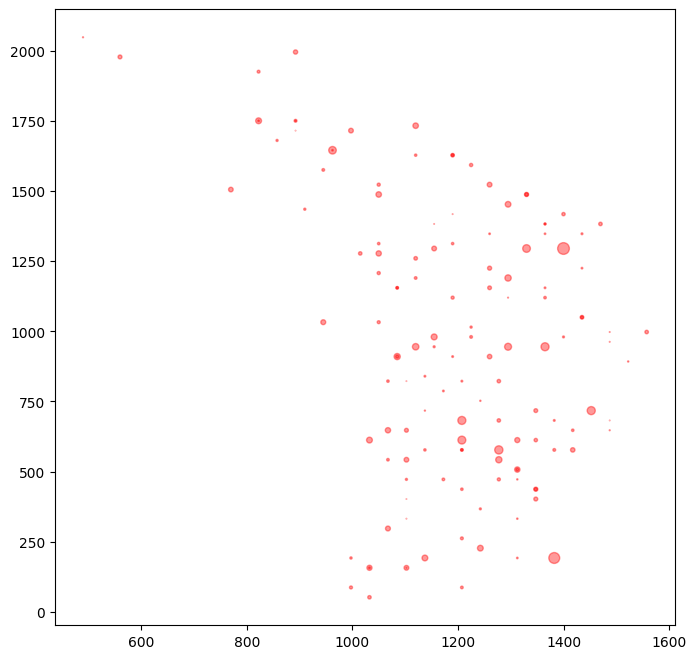

In [6]:
# Create plot of neuron positions
neuron_xy = []
for neuron in sd.neuron_data[0].values():
    neuron_xy.append( [neuron['position'][0], neuron['position'][1]] )
neuron_xy = np.array(neuron_xy)
fig = plt.figure(figsize=(8, 8))
ax = plt.axes()  


                  # get axis element to later create plot
ax.scatter( neuron_xy[:,0], neuron_xy[:,1], s=(fire_rates**1.4)*3, alpha=.4,  c='red')


In [12]:
#norm = plt.Normalize( vmin= np.mean(fire_rates)-np.std(fire_rates), vmax= np.mean(fire_rates)+np.std(fire_rates) )

## <font color="brown"> make time sequence

In [7]:
my_range = range(0, int(sd.length), 500)

In [9]:
i=0

In [11]:
sd_small = sd.subtime( i, i+my_range.step )

In [12]:
firing_rates(sd_small)

array([ 0.,  2.,  4.,  4.,  0.,  2.,  4.,  0.,  0.,  0.,  2.,  4.,  4.,
        4.,  2.,  4.,  0.,  0.,  2.,  2.,  0.,  4.,  2.,  0.,  0.,  0.,
        0.,  0.,  2.,  4.,  0.,  0.,  0.,  2.,  0.,  4.,  0.,  0.,  0.,
        2.,  0.,  0.,  6.,  0.,  0.,  2.,  0.,  4.,  4.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  4.,  2.,  0.,
        0.,  0.,  6.,  0.,  0.,  2.,  0.,  0.,  0.,  2.,  4.,  0.,  4.,
        0.,  0.,  0.,  0.,  2.,  0.,  0.,  2.,  6.,  4.,  0.,  0.,  2.,
        0.,  0.,  0.,  0.,  2.,  6.,  0.,  0., 12.,  0.,  2.,  0.,  6.,
        2.,  4.,  0.,  4.,  2.,  4.,  2.,  4.,  2.,  4.,  2.,  0.,  2.,
        2.,  6.,  6.,  0.,  0.,  0.,  2.,  4.,  4.,  0.,  8.,  6., 14.,
        0.,  0.,  0.,  2.,  0.,  0.])

## <font color="brown"> make animation

In [16]:
size_exp = 1.4
size_scale = 3
movie_range_ms = range(0, int(sd.length), 500)
filename = "firing_rate.mp4"
frame_interval_ms= 100

/tmp/ipykernel_586/796760502.py:2: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


Saved animation to firing_rate.mp4


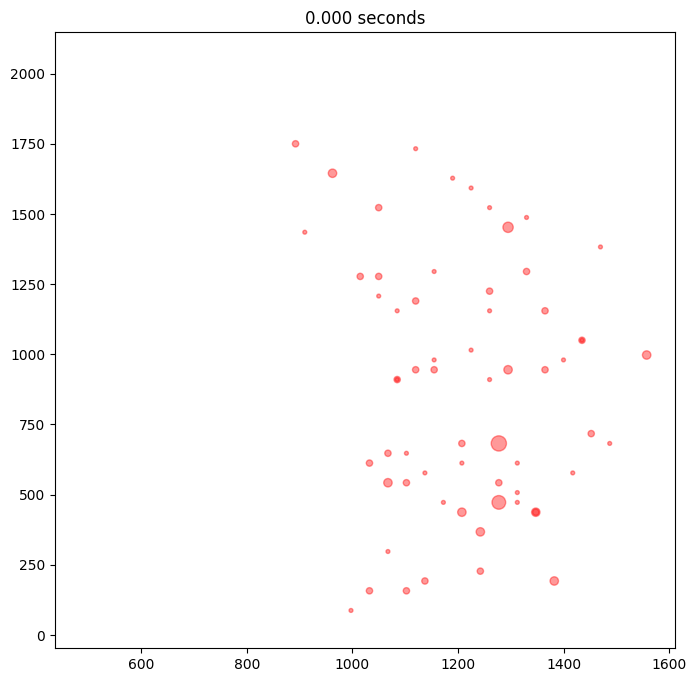

In [20]:



neuron_xy = []
for neuron in sd.neuron_data[0].values():
    neuron_xy.append( [neuron['position'][0], neuron['position'][1]] )
neuron_xy = np.array(neuron_xy)

# get axis element and create plot
fig = plt.figure(figsize=(8, 8))
ax = plt.axes()  
scatter = ax.scatter( neuron_xy[:,0], neuron_xy[:,1], s=(firing_rates(sd)**size_exp)*size_scale, alpha=.4,  c='red')

# animation function.  This is called sequentially
def animate(i):
    sd_small = sd.subtime( i, i+movie_range_ms.step )
    scatter._sizes = (firing_rates(sd_small)**size_exp) * size_scale
    ax.set_title(f"{i/1000:.3f} seconds")
    return scatter
anim = FuncAnimation(fig, animate, frames=movie_range_ms , interval=frame_interval_ms, blit=False)
anim.save( filename )
print( f"Saved animation to {filename}" )



In [19]:
video_length = round( len(movie_range_ms)*frame_interval_ms/1000/60 ,3)
video_length

1.285

NameError: name 'to_list' is not defined

## <font color="brown"> animation function

In [21]:
def animate_firing_rate(sd, movie_range_ms=None, frame_interval_ms=100,  filename="firing_rate.mp4", size_exp=1.4, size_scale=3 ):

    # creat movie range
    movie_range_ms = range(0, int(sd.length), 1000) if movie_range_ms is None else movie_range_ms
    video_length = round( len(movie_range_ms)*frame_interval_ms/1000/60 ,3)
    print(f"Making animation of {video_length} minutes")

    # get neuron positions
    neuron_xy = []
    for neuron in sd.neuron_data[0].values():
        neuron_xy.append( [neuron['position'][0], neuron['position'][1]] )
    neuron_xy = np.array(neuron_xy)

    # get axis element and create plot
    fig = plt.figure(figsize=(8, 8))
    ax = plt.axes()  
    scatter = ax.scatter( neuron_xy[:,0], neuron_xy[:,1], s=(firing_rates(sd)**size_exp)*size_scale, alpha=.4,  c='red')

    # animation function.  This is called sequentially
    def animate(i):
        sd_small = sd.subtime( i, i+movie_range_ms.step )
        scatter._sizes = (firing_rates(sd_small)**size_exp) * size_scale
        ax.set_title(f"{i/1000:.3f} seconds")
        return scatter
    anim = FuncAnimation(fig, animate, frames=movie_range_ms , interval=frame_interval_ms, blit=False)
    anim.save( filename )
    print( f"Saved animation to {filename}" )


Making animation of 0.643 minutes


/tmp/ipykernel_586/2026553274.py:10: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


Saved animation to firing_rate.mp4


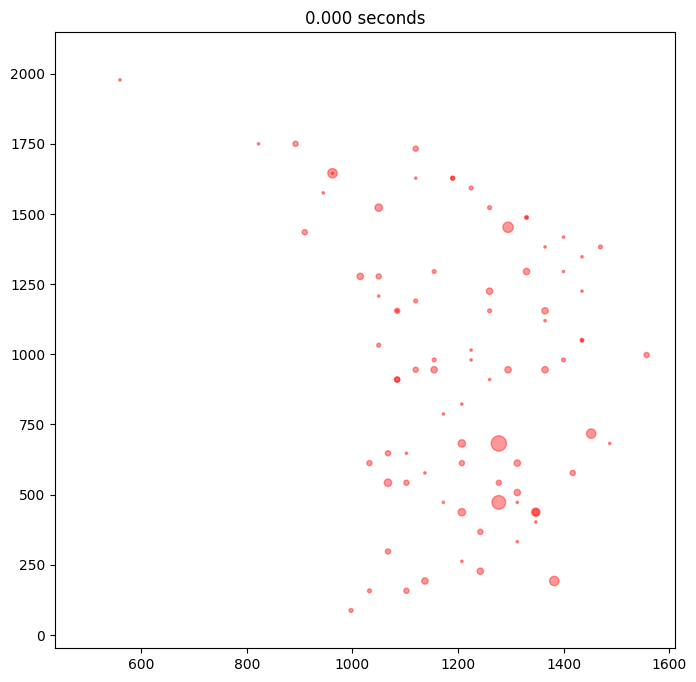

In [22]:
animate_firing_rate(sd)

## <font color="brown"> multiplot

In [23]:
from scipy.ndimage import gaussian_filter1d

In [ ]:
size_exp = 1.4
size_scale = 3
movie_range_ms = range(0, int(sd.length), 500)
filename = "firing_rate.mp4"
frame_interval_ms= 100

Making animation of 1.285 minutes


/tmp/ipykernel_586/3487522990.py:10: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


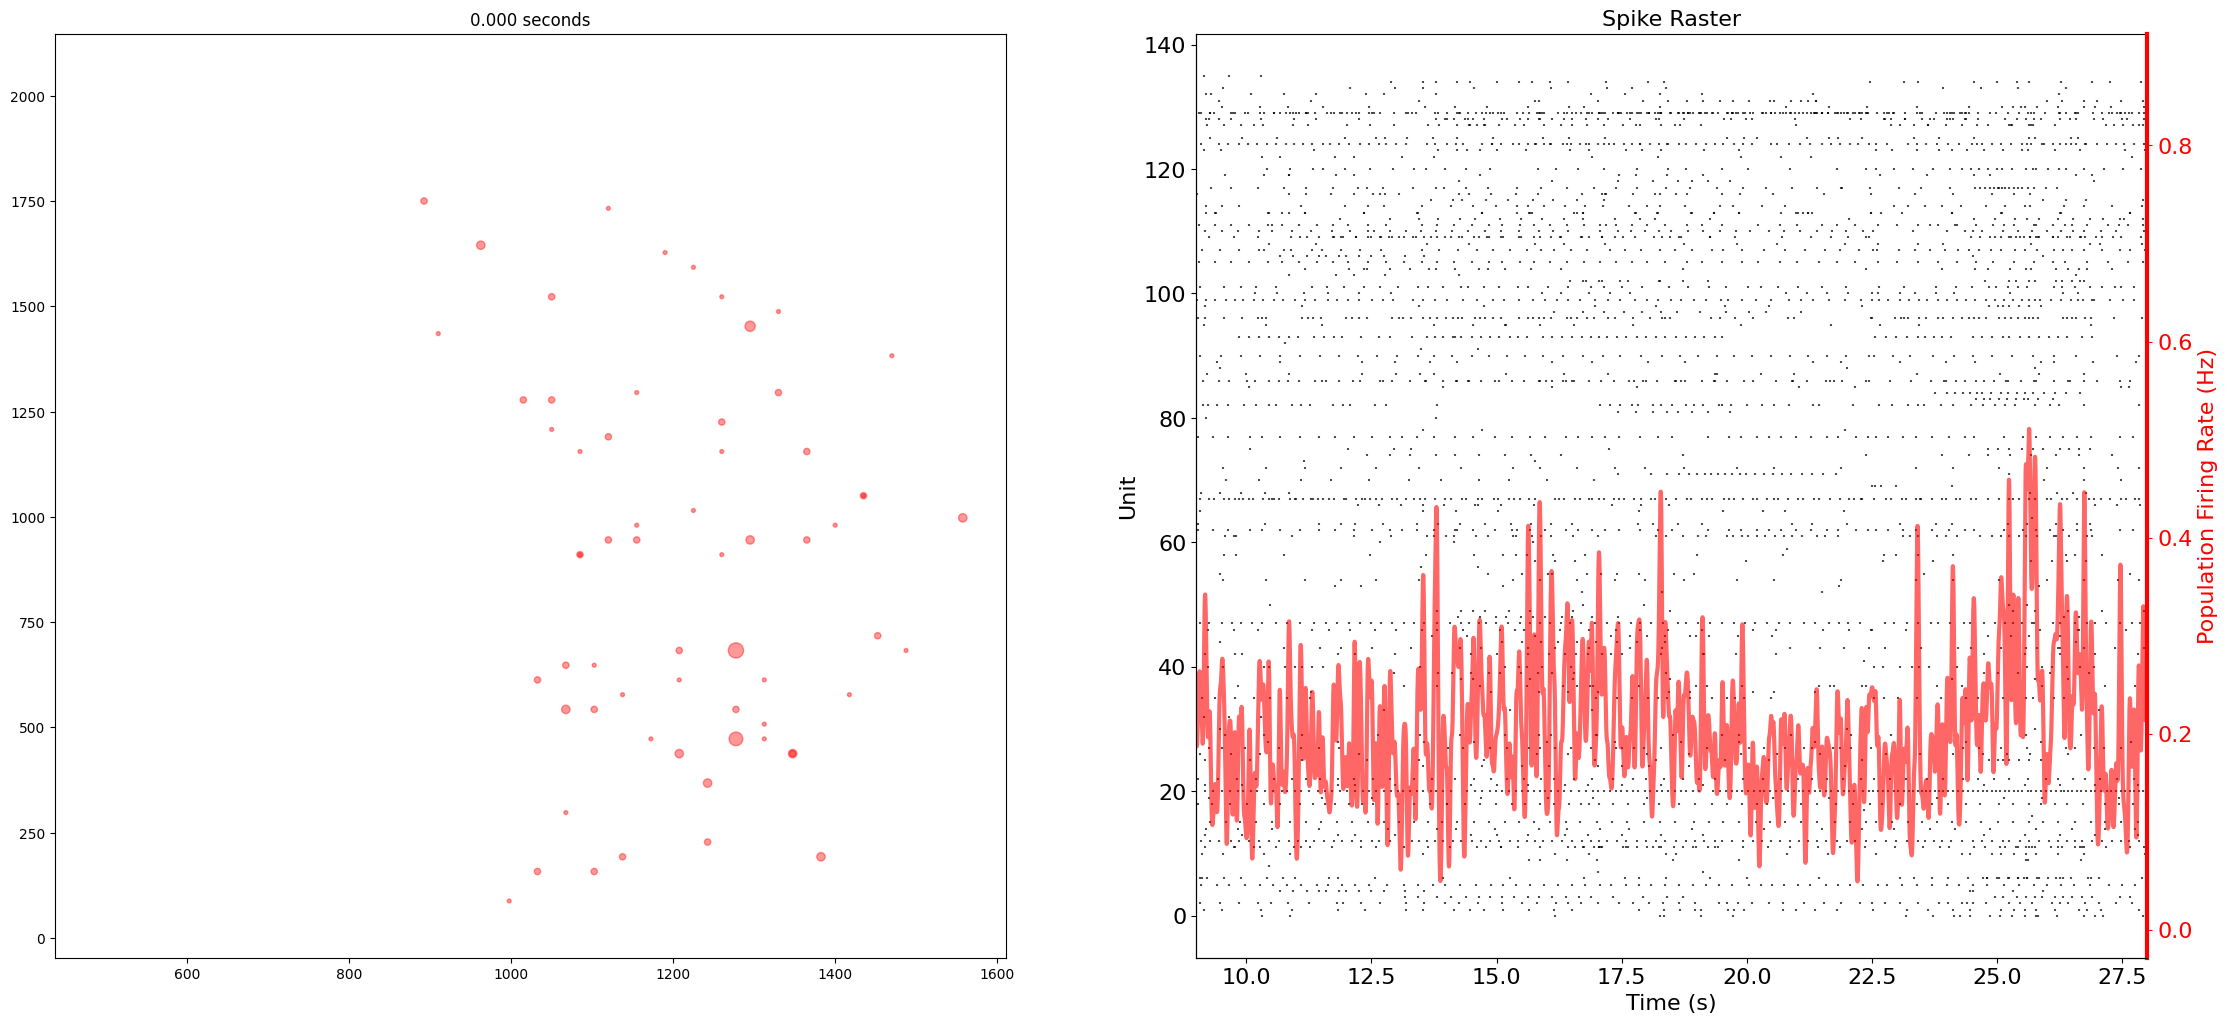

In [24]:
fig, plots = plt.subplots(nrows=1,ncols=2,figsize=(27,12))

# creat movie range
movie_range_ms = range(0, int(sd.length), 1000) if movie_range_ms is None else movie_range_ms
video_length = round( len(movie_range_ms)*frame_interval_ms/1000/60 ,3)
print(f"Making animation of {video_length} minutes")

# get neuron positions and create firing rate plot
neuron_xy = []
for neuron in sd.neuron_data[0].values():
    neuron_xy.append( [neuron['position'][0], neuron['position'][1]] )
neuron_xy = np.array(neuron_xy)
plot0 = plots[0].scatter( neuron_xy[:,0], neuron_xy[:,1], s=(firing_rates(sd)**size_exp)*size_scale, alpha=.4,  c='red' )

### Code for Raster ###
# Get firing rate
pop_rate = sd.binned(bin_size=1)
pop_fr = gaussian_filter1d(pop_rate.astype(float), sigma=20)
bins = np.linspace(0, sd.length, pop_rate.shape[0] ) #/1000
plots[1].set_title("Spike Raster", fontsize=16)

y = 0
for vv in sd.train:
    plots[1].scatter(vv/1000, [y]*len(vv), marker="|", c='k', s=4, alpha=0.7)
    y += 1
plots[1].set_xlabel("Time (s)", fontsize=16)
plots[1].set_ylabel("Unit", fontsize=16)
plots[1].xaxis.set_tick_params(labelsize=16)
plots[1].yaxis.set_tick_params(labelsize=16)

axs1 = plots[1].twinx()
axs1.yaxis.set_label_position("right") 
axs1.spines['right'].set_color('r')
axs1.spines['right'].set_linewidth(3)
axs1.plot(bins/1000, pop_fr, color='r', linewidth=3, alpha=0.6)
axs1.set_ylabel("Population Firing Rate (Hz)", fontsize=16, color='r')
axs1.set_xlabel("Time (ms)", fontsize=16)
axs1.yaxis.set_tick_params(labelsize=16)
#axs1.set_xlim((9, 28))
#axs1.set_ylim(ylim)
axs1.spines['top'].set_visible(False)
axs1.get_xaxis().set_visible(False)
axs1.tick_params(left=False, right=True, labelleft=False, labelright=True,
                bottom=False, labelbottom=True)
axs1.tick_params(axis='y', colors='r')
vl = plots[1].axvline(x=10, color='green', linewidth=2, linestyle='-')
 

# animation function.  This is called sequentially
def animate(i):
    # Wave plot
    sd_small = sd.subtime( i, i+movie_range_ms.step )
    plot0._sizes = (firing_rates(sd_small)**size_exp) * size_scale
    plots[0].set_title(f"{i/1000:.3f} seconds")
    # Raster Plot
    t = 0 + i/1000
    vl.set_xdata([t,t])
    return plots

anim = FuncAnimation(fig, animate, frames=movie_range_ms, interval=frame_interval_ms, blit=False)  
anim.save( filename )